<a href="https://colab.research.google.com/github/DEVAPRAKSAM/Raster/blob/main/all_pynib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

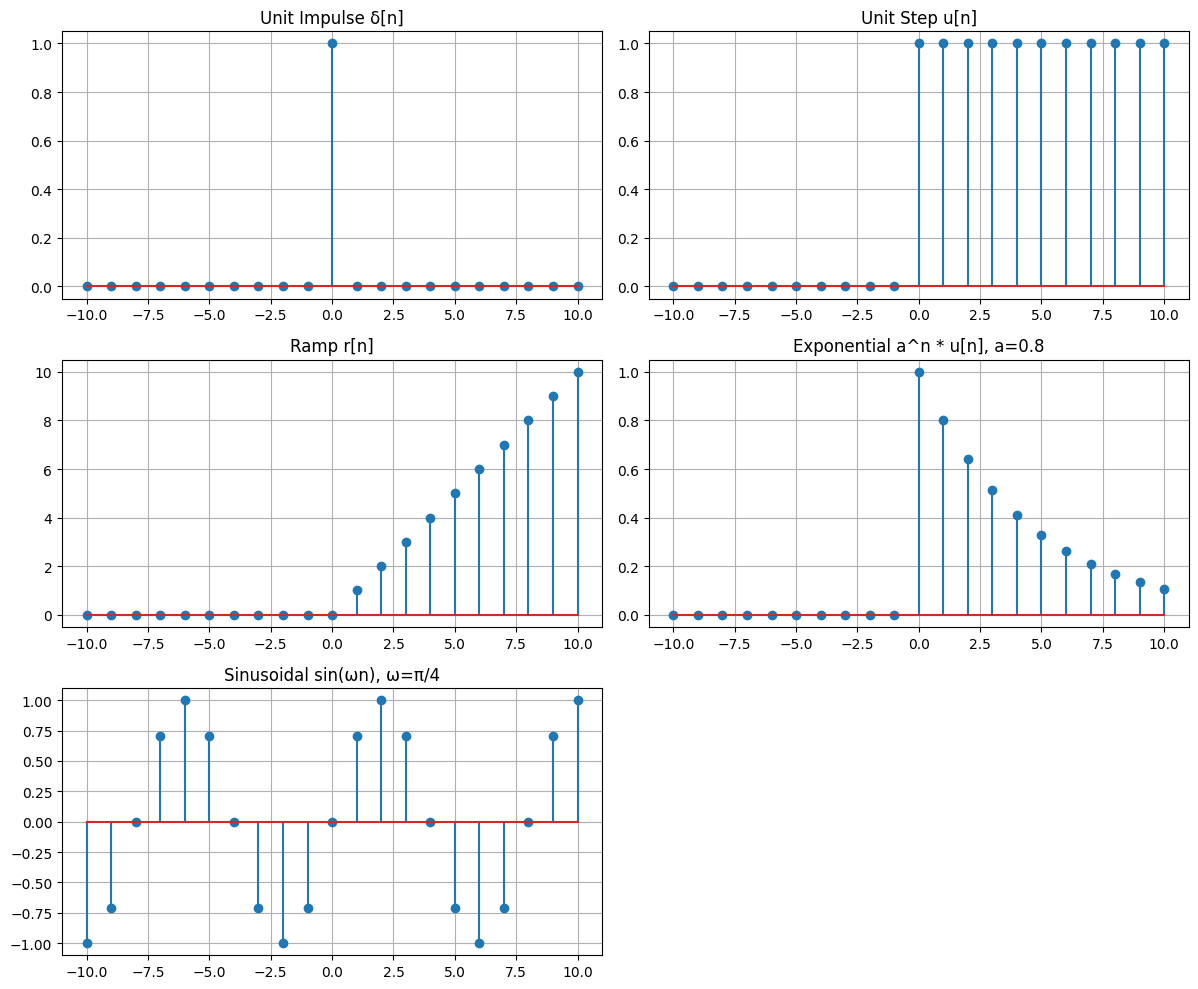

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time index range
n = np.arange(-10, 11, 1)

# Elementary discrete-time sequences
delta = np.where(n == 0, 1, 0)             # Unit impulse δ[n]
step = np.where(n >= 0, 1, 0)              # Unit step u[n]
ramp = np.where(n >= 0, n, 0)              # Ramp r[n]
a = 0.8
expo = np.where(n >= 0, a**n, 0)           # Exponential a^n * u[n]
omega = np.pi / 4
sine = np.sin(omega * n)                  # Sinusoidal sin(ωn)

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
# Removed use_line_collection argument as it's no longer supported in newer Matplotlib versions
plt.stem(n, delta)
plt.title('Unit Impulse δ[n]')
plt.grid()

plt.subplot(3, 2, 2)
# Removed use_line_collection argument
plt.stem(n, step)
plt.title('Unit Step u[n]')
plt.grid()

plt.subplot(3, 2, 3)
# Removed use_line_collection argument
plt.stem(n, ramp)
plt.title('Ramp r[n]')
plt.grid()

plt.subplot(3, 2, 4)
# Removed use_line_collection argument
plt.stem(n, expo)
plt.title('Exponential a^n * u[n], a=0.8')
plt.grid()

plt.subplot(3, 2, 5)
# Removed use_line_collection argument
plt.stem(n, sine)
plt.title('Sinusoidal sin(ωn), ω=π/4')
plt.grid()

plt.tight_layout()
plt.show()

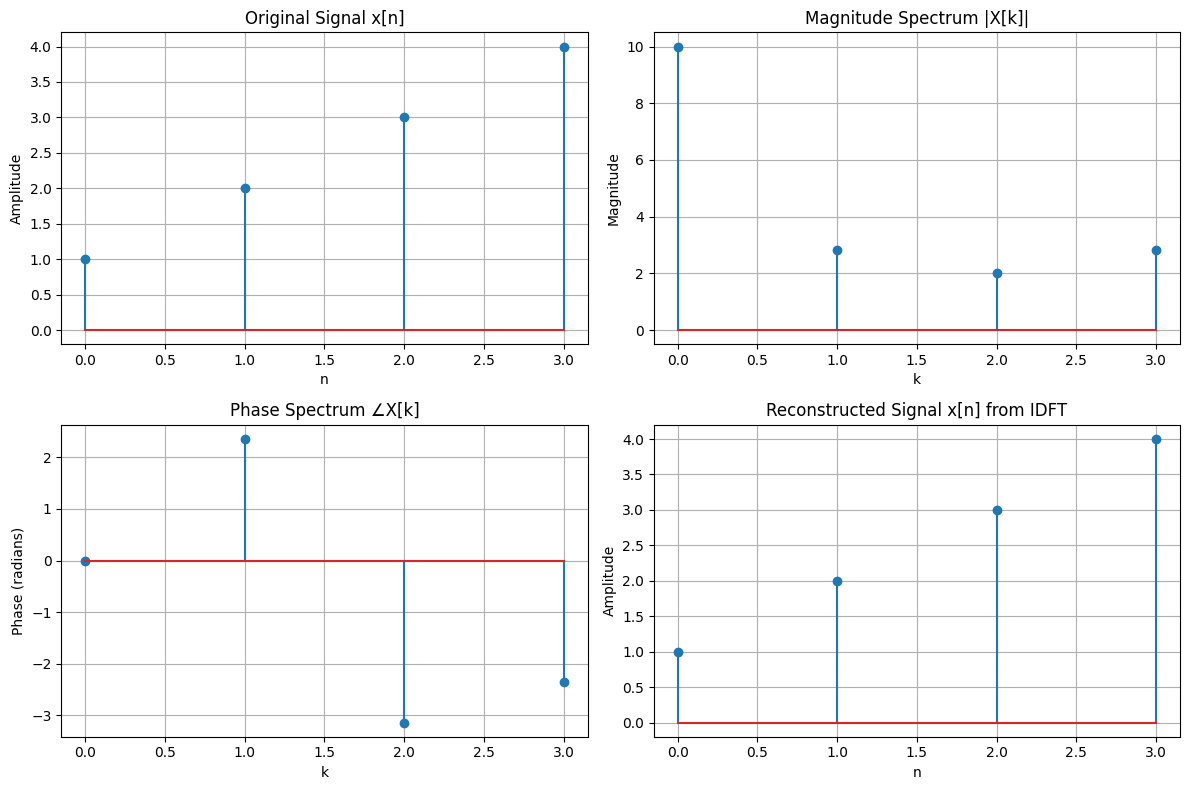

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# DFT function
def DFT(x):
    N = len(x)
    X = []
    for k in range(N):
        sum_val = 0
        for n in range(N):
            sum_val += x[n] * np.exp(-2j * np.pi * k * n / N)
        X.append(sum_val)
    return np.array(X)

# IDFT function
def IDFT(X):
    N = len(X)
    x = []
    for n in range(N):
        sum_val = 0
        for k in range(N):
            sum_val += X[k] * np.exp(2j * np.pi * k * n / N)
        x.append(sum_val / N)
    return np.array(x)

# Input signal
x = np.array([1, 2, 3, 4])

# Compute DFT and IDFT
X = DFT(x)
x_reconstructed = IDFT(X)

# Plotting
n = np.arange(len(x))

plt.figure(figsize=(12, 8))

# Original signal
plt.subplot(2, 2, 1)
# Removed use_line_collection as it's no longer a valid argument
plt.stem(n, x)
plt.title('Original Signal x[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid()

# Magnitude spectrum
plt.subplot(2, 2, 2)
# Removed use_line_collection as it's no longer a valid argument
plt.stem(n, np.abs(X))
plt.title('Magnitude Spectrum |X[k]|')
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.grid()

# Phase spectrum
plt.subplot(2, 2, 3)
# Removed use_line_collection as it's no longer a valid argument
plt.stem(n, np.angle(X))
plt.title('Phase Spectrum ∠X[k]')
plt.xlabel('k')
plt.ylabel('Phase (radians)')
plt.grid()

# Reconstructed signal
plt.subplot(2, 2, 4)
# Removed use_line_collection as it's no longer a valid argument
plt.stem(n, x_reconstructed.real)
plt.title('Reconstructed Signal x[n] from IDFT')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

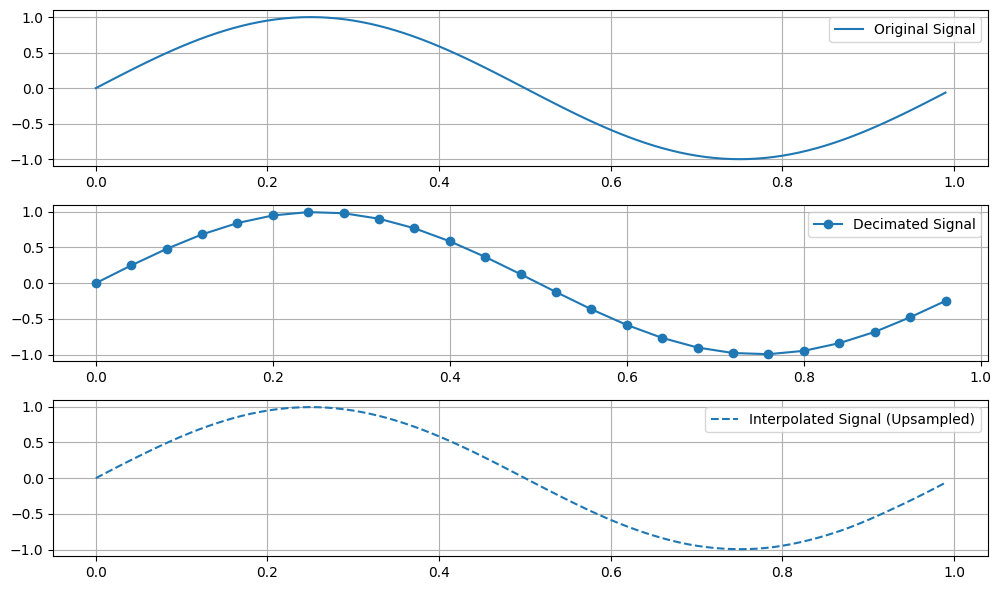

In [ ]:
#Decimation and Interpolation

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import decimate, resample

# Generate a high-resolution signal
fs = 100  # Original sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector (1 second)
signal = np.sin(2 * np.pi * 1 * t)  # 1 Hz sine wave

# Decimation: Downsampling by a factor of 4
decimation_factor = 4
downsampled_signal = decimate(signal, decimation_factor)

# Interpolation: Upsampling back by a factor of 4
upsampled_signal = resample(downsampled_signal, len(signal))

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, signal, label="Original Signal")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t[::decimation_factor], downsampled_signal, 'o-', label="Decimated Signal")
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, upsampled_signal, '--', label="Interpolated Signal (Upsampled)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Enter the first sequence (space-separated): 1 2 3 4 
Enter the second sequence (space-separated): 1 1 1 1 


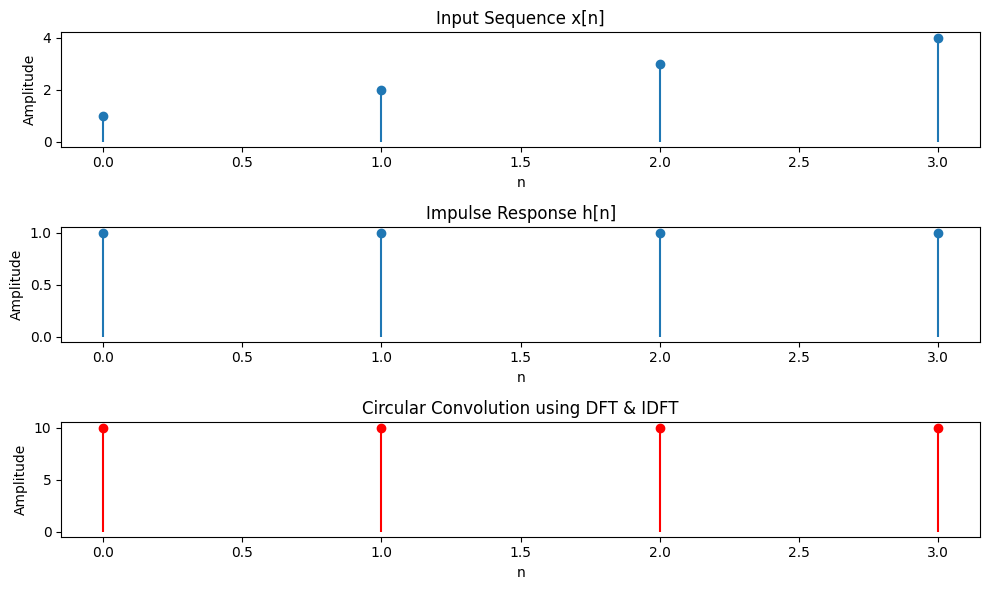

Circular Convolution Result: [10. 10. 10. 10.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def circular_convolution_dft_idft(x, h):
    N = max(len(x), len(h))  # Use max length for circular convolution

    # Zero-pad both sequences to length N
    x = np.pad(x, (0, N - len(x)), mode='constant')
    h = np.pad(h, (0, N - len(h)), mode='constant')

    # Compute DFT of both sequences
    X = np.fft.fft(x)
    H = np.fft.fft(h)

    # Element-wise multiplication in frequency domain
    Y = X * H

    # Compute IDFT to get circular convolution result
    y = np.fft.ifft(Y).real  # Taking only real part

    return y

# Take user input for sequences
x = list(map(int, input("Enter the first sequence (space-separated): ").split()))
h = list(map(int, input("Enter the second sequence (space-separated): ").split()))

# Compute circular convolution using DFT and IDFT
result = circular_convolution_dft_idft(x, h)

# Plot the sequences and result
plt.figure(figsize=(10, 6))

# Plot input sequence x
plt.subplot(3, 1, 1)
plt.stem(range(len(x)), x, basefmt=" ")
plt.title("Input Sequence x[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")

# Plot input sequence h
plt.subplot(3, 1, 2)
plt.stem(range(len(h)), h, basefmt=" ")
plt.title("Impulse Response h[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")

# Plot circular convolution result
plt.subplot(3, 1, 3)
plt.stem(range(len(result)), result, basefmt=" ", linefmt='r', markerfmt='ro')
plt.title("Circular Convolution using DFT & IDFT")
plt.xlabel("n")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

# Print result
print("Circular Convolution Result:", result)

Toeplitz Matrix (Convolution Matrix):
 [[1. 0. 0.]
 [2. 1. 0.]
 [3. 2. 1.]
 [4. 3. 2.]
 [0. 4. 3.]
 [0. 0. 4.]]
Linear Convolution Output:  [ 1.  1.  2.  3. -1.  4.]


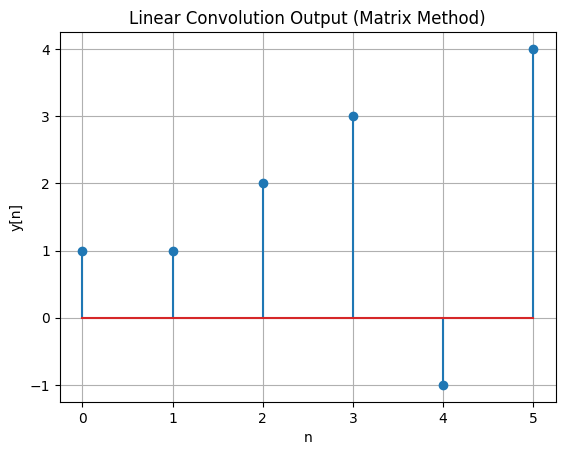

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input sequences
x = [1, 2, 3, 4]   # Example input 1
h = [1, -1, 1]     # Example input 2 (impulse response)

# Lengths
N = len(x)
M = len(h)
L = N + M - 1   # Length of output

# Create Toeplitz matrix for x
toeplitz_matrix = np.zeros((L, M))

for i in range(L):
    for j in range(M):
        if 0 <= i - j < N:
            toeplitz_matrix[i][j] = x[i - j]

print("Toeplitz Matrix (Convolution Matrix):\n", toeplitz_matrix)

# Convert h into column vector
h_col = np.array(h).reshape(-1,1)

# Linear convolution using matrix multiplication
y = np.dot(toeplitz_matrix, h_col).flatten()

print("Linear Convolution Output: ", y)

# Plotting the output
plt.stem(range(len(y)),y)
plt.title("Linear Convolution Output (Matrix Method)")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)
plt.show()

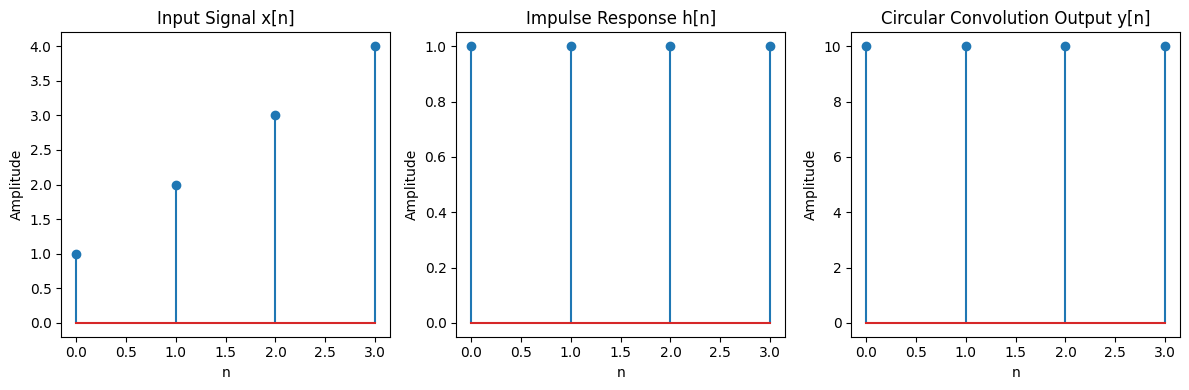

Circular Convolution Output y[n]: [10. 10. 10. 10.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute circular convolution using the matrix method
def circular_convolution_matrix(x, h):
    N = len(x)

    # Construct the circular matrix for h
    circ_matrix = np.zeros((N, N))  # Create an NxN zero matrix
    for i in range(N):
        circ_matrix[i] = np.roll(h, i)  # Shift h circularly

    # Perform matrix multiplication
    y = np.dot(circ_matrix, x)

    return y

# Define input sequences
x = np.array([1, 2, 3, 4])  # Example input signal
h = np.array([1, 1, 1, 1])  # Example impulse response

# Ensure both sequences have the same length by zero-padding
N = max(len(x), len(h))
x = np.pad(x, (0, N - len(x)), mode='constant')
h = np.pad(h, (0, N - len(h)), mode='constant')

# Compute circular convolution
y = circular_convolution_matrix(x, h)

# Plot the input and output signals
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.stem(range(len(x)), x)
plt.title("Input Signal x[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")

plt.subplot(1, 3, 2)
plt.stem(range(len(h)), h)
plt.title("Impulse Response h[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")

plt.subplot(1, 3, 3)
plt.stem(range(len(y)), y)
plt.title("Circular Convolution Output y[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

# Print the output sequence
print("Circular Convolution Output y[n]:", y)

Toeplitz Matrix (Linear Convolution):
 [[1. 0. 0.]
 [2. 1. 0.]
 [3. 2. 1.]
 [4. 3. 2.]
 [0. 4. 3.]
 [0. 0. 4.]]
Circular Matrix (Circular Convolution):
 [[ 1. -1.  1.  0.]
 [ 0.  1. -1.  1.]
 [ 1.  0.  1. -1.]
 [-1.  1.  0.  1.]]
Linear Convolution Output: [ 1.  1.  2.  3. -1.  4.]
Circular Convolution Output (DFT & IDFT): [0. 5. 2. 3.]
Circular Convolution Output (Matrix Method): [2. 3. 0. 5.]


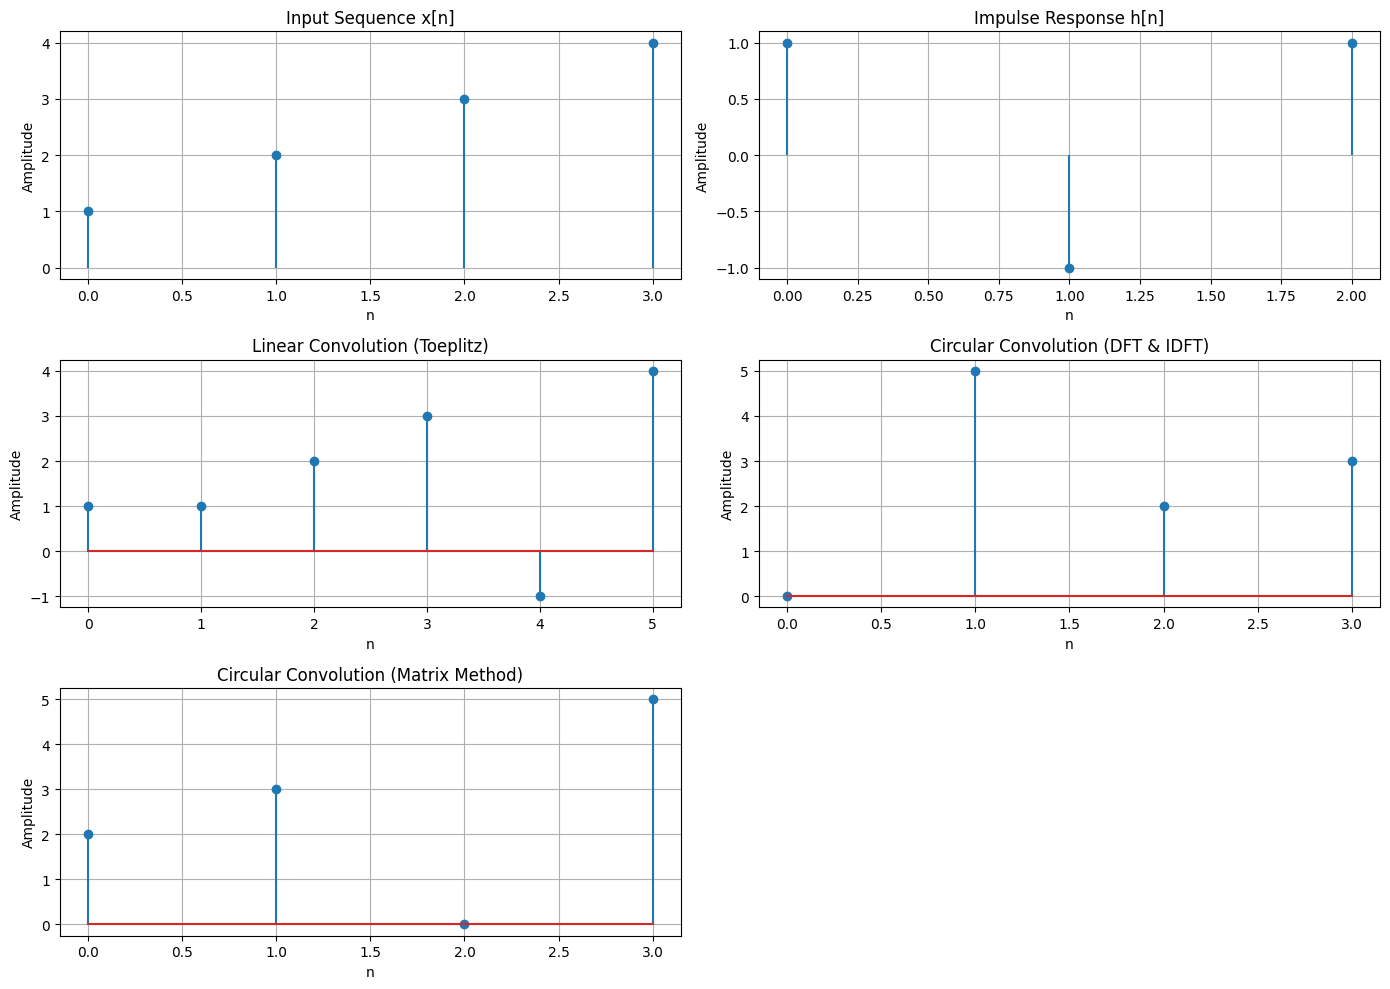

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === 1. Circular Convolution using DFT & IDFT ===
def circular_convolution_dft_idft(x, h):
    N = max(len(x), len(h))
    x = np.pad(x, (0, N - len(x)))
    h = np.pad(h, (0, N - len(h)))
    X = np.fft.fft(x)
    H = np.fft.fft(h)
    Y = X * H
    y = np.fft.ifft(Y).real
    return y

# === 2. Linear Convolution using Toeplitz Matrix ===
def linear_convolution_toeplitz(x, h):
    N = len(x)
    M = len(h)
    L = N + M - 1
    toeplitz_matrix = np.zeros((L, M))
    for i in range(L):
        for j in range(M):
            if 0 <= i - j < N:
                toeplitz_matrix[i][j] = x[i - j]
    h_col = np.array(h).reshape(-1, 1)
    y = np.dot(toeplitz_matrix, h_col).flatten()
    return y, toeplitz_matrix

# === 3. Circular Convolution using Circular Matrix ===
def circular_convolution_matrix(x, h):
    N = max(len(x), len(h))
    x = np.pad(x, (0, N - len(x)))
    h = np.pad(h, (0, N - len(h)))
    circ_matrix = np.zeros((N, N))
    for i in range(N):
        circ_matrix[i] = np.roll(h, i)
    y = np.dot(circ_matrix, x)
    return y, circ_matrix

# === Input Sequences ===
x = [1, 2, 3, 4]
h = [1, -1, 1]

# === Compute Outputs ===
circ_dft_idft = circular_convolution_dft_idft(x, h)
lin_conv, toeplitz_matrix = linear_convolution_toeplitz(x, h)
circ_matrix_out, circ_matrix = circular_convolution_matrix(x, h)

# === Print Matrix Representations and Results ===
print("Toeplitz Matrix (Linear Convolution):\n", toeplitz_matrix)
print("Circular Matrix (Circular Convolution):\n", circ_matrix)
print("Linear Convolution Output:", lin_conv)
print("Circular Convolution Output (DFT & IDFT):", circ_dft_idft)
print("Circular Convolution Output (Matrix Method):", circ_matrix_out)

# === Plotting ===
plt.figure(figsize=(14, 10))

# Input x[n]
plt.subplot(3, 2, 1)
plt.stem(range(len(x)), x, basefmt=" ")
plt.title("Input Sequence x[n]")
plt.xlabel("n"); plt.ylabel("Amplitude"); plt.grid(True)

# Input h[n]
plt.subplot(3, 2, 2)
plt.stem(range(len(h)), h, basefmt=" ")
plt.title("Impulse Response h[n]")
plt.xlabel("n"); plt.ylabel("Amplitude"); plt.grid(True)

# Linear Convolution Output
plt.subplot(3, 2, 3)
plt.stem(range(len(lin_conv)), lin_conv)
plt.title("Linear Convolution (Toeplitz)")
plt.xlabel("n"); plt.ylabel("Amplitude"); plt.grid(True)

# Circular Convolution using DFT/IDFT
plt.subplot(3, 2, 4)
plt.stem(range(len(circ_dft_idft)), circ_dft_idft)
plt.title("Circular Convolution (DFT & IDFT)")
plt.xlabel("n"); plt.ylabel("Amplitude"); plt.grid(True)

# Circular Convolution using Matrix
plt.subplot(3, 2, 5)
plt.stem(range(len(circ_matrix_out)), circ_matrix_out)
plt.title("Circular Convolution (Matrix Method)")
plt.xlabel("n"); plt.ylabel("Amplitude"); plt.grid(True)

plt.tight_layout()
plt.show()

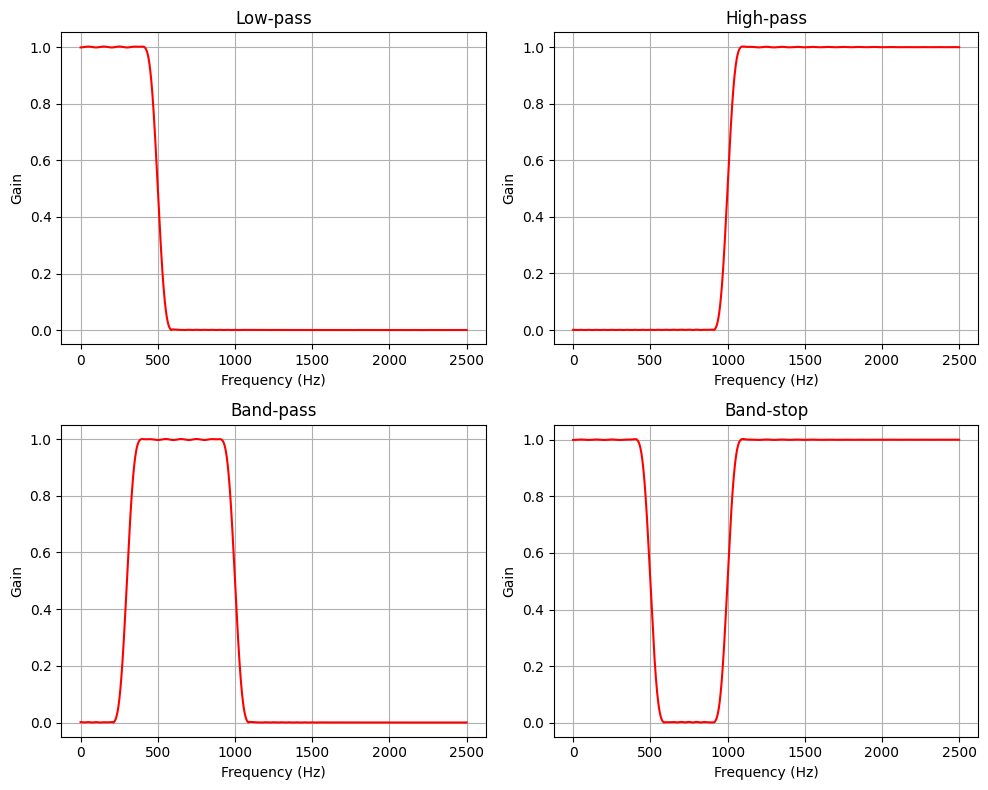

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Sampling frequency (Hz)
fs = 5000  # Adjust as needed

# Define cutoff frequencies
low_cutoff = 500    # Low-pass cutoff (Hz)
high_cutoff = 1000  # High-pass cutoff (Hz)
bp_cutoff = [300, 1000]   # Band-pass range (Hz)
bs_cutoff = [500, 1000]   # Band-stop range (Hz)

# Number of filter taps (order + 1)
num_taps = 101

# Design FIR filters
lp_fir = signal.firwin(num_taps, low_cutoff, fs=fs, pass_zero=True)   # Low-pass
hp_fir = signal.firwin(num_taps, high_cutoff, fs=fs, pass_zero=False)  # High-pass
bp_fir = signal.firwin(num_taps, bp_cutoff, fs=fs, pass_zero=False)    # Band-pass
bs_fir = signal.firwin(num_taps, bs_cutoff, fs=fs, pass_zero=True)     # Band-stop

# Frequency response
filters = {'Low-pass': lp_fir, 'High-pass': hp_fir, 'Band-pass': bp_fir, 'Band-stop': bs_fir}
plt.figure(figsize=(10, 8))

for i, (name, fir_coeffs) in enumerate(filters.items(), 1):
    w, h = signal.freqz(fir_coeffs, worN=8000)
    plt.subplot(2, 2, i)
    plt.plot(w * fs / (2 * np.pi), abs(h), 'r')
    plt.title(name)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid()

plt.tight_layout()
plt.show()

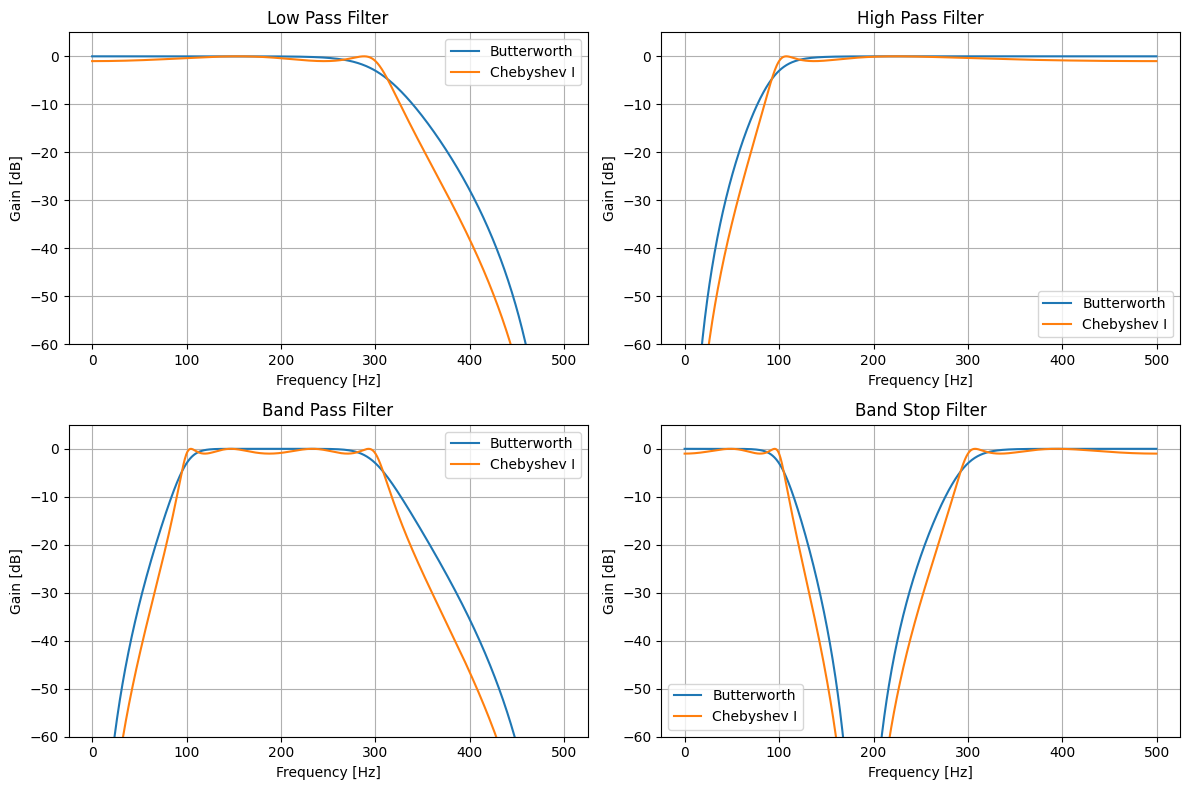

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, cheby1, freqz

# Sampling and filter specs
fs = 1000          # Sampling frequency in Hz
order = 4          # Filter order
rp = 1             # Passband ripple for Chebyshev Type I
lowcut = 100       # Low cutoff frequency in Hz
highcut = 300      # High cutoff frequency in Hz

# Normalize frequencies for digital filter design
low = lowcut / (0.5 * fs)
high = highcut / (0.5 * fs)

# Design function for filters
def design_filters():
    filters = {}

    # Butterworth filters
    filters['Butter_LPF'] = butter(order, high, btype='low', output='ba')
    filters['Butter_HPF'] = butter(order, low, btype='high', output='ba')
    filters['Butter_BPF'] = butter(order, [low, high], btype='band', output='ba')
    filters['Butter_BSF'] = butter(order, [low, high], btype='bandstop', output='ba')

    # Chebyshev Type I filters
    filters['Cheby_LPF'] = cheby1(order, rp, high, btype='low', output='ba')
    filters['Cheby_HPF'] = cheby1(order, rp, low, btype='high', output='ba')
    filters['Cheby_BPF'] = cheby1(order, rp, [low, high], btype='band', output='ba')
    filters['Cheby_BSF'] = cheby1(order, rp, [low, high], btype='bandstop', output='ba')

    return filters

# Plotting function
def plot_all_filters(filters):
    titles = ['Low Pass Filter', 'High Pass Filter', 'Band Pass Filter', 'Band Stop Filter']
    types = ['LPF', 'HPF', 'BPF', 'BSF']

    plt.figure(figsize=(12, 8))

    for i, ftype in enumerate(types):
        plt.subplot(2, 2, i+1)

        # Butterworth
        b, a = filters[f'Butter_{ftype}']
        w, h = freqz(b, a, worN=1024)
        plt.plot(w * fs / (2 * np.pi), 20 * np.log10(abs(h)), label='Butterworth')

        # Chebyshev
        b, a = filters[f'Cheby_{ftype}']
        w, h = freqz(b, a, worN=1024)
        plt.plot(w * fs / (2 * np.pi), 20 * np.log10(abs(h)), label='Chebyshev I')

        plt.title(titles[i])
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Gain [dB]')
        plt.grid(True)
        plt.legend()
        plt.ylim(-60, 5)  # consistent dB scale

    plt.tight_layout()
    plt.show()

# Run the program
filters = design_filters()
plot_all_filters(filters)

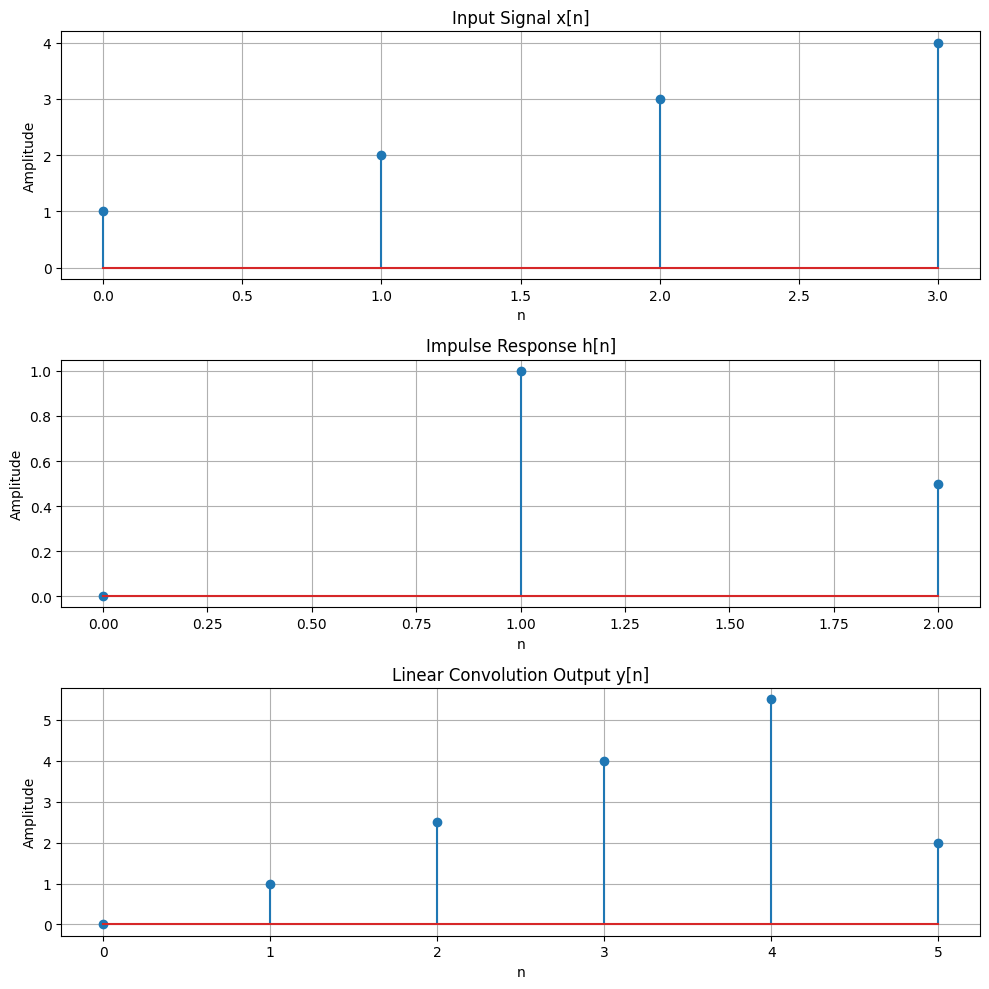

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define two discrete signals
x = np.array([1, 2, 3, 4])
h = np.array([0, 1, 0.5])

# Perform linear convolution
y = np.convolve(x, h, mode='full')

# Generate time indices
t_x = np.arange(len(x))
t_h = np.arange(len(h))
t_y = np.arange(len(y))

# Plot the signals
plt.figure(figsize=(10,10))

plt.subplot(3, 1, 1)
plt.stem(t_x, x)
plt.title('Input Signal x[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(3, 1, 2)
plt.stem(t_h, h)
plt.title('Impulse Response h[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(3, 1, 3)
plt.stem(t_y, y)
plt.title('Linear Convolution Output y[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

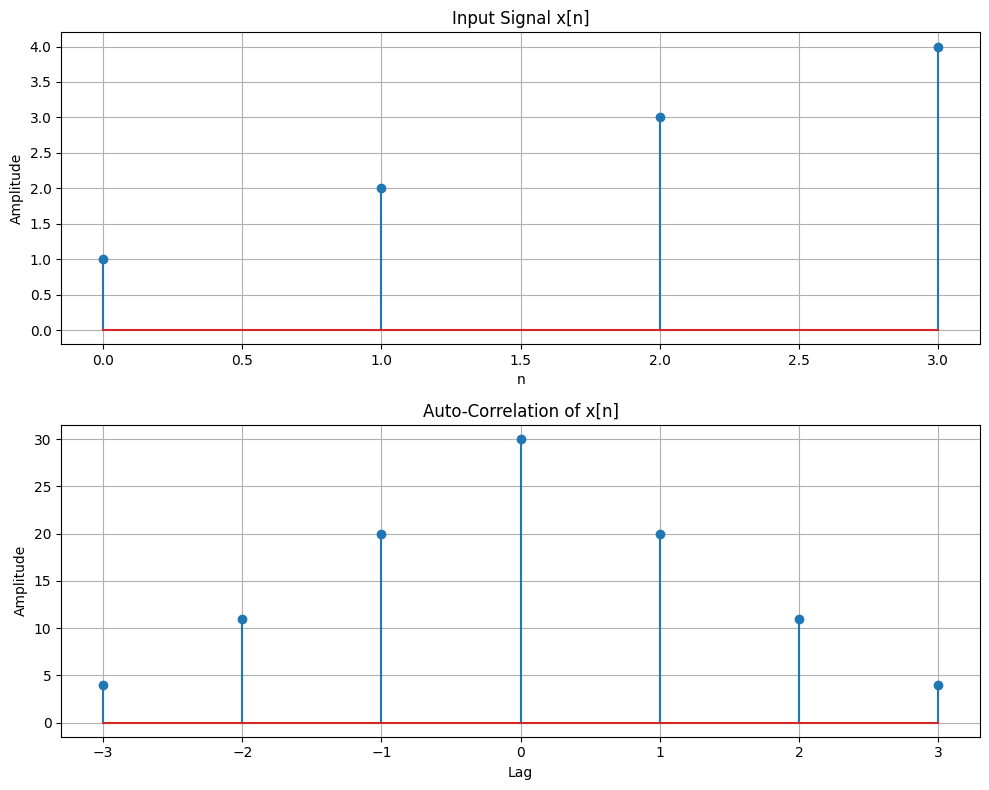

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a discrete signal
x = np.array([1, 2, 3, 4])

# Compute auto-correlation
y = np.correlate(x, x, mode='full')

# Generate time indices
t_x = np.arange(len(x))
t_y = np.arange(-len(x) + 1, len(x))

# Plot the signals
plt.figure(figsize=(10,8))

plt.subplot(2, 1, 1)
plt.stem(t_x, x)
plt.title('Input Signal x[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(t_y, y)
plt.title('Auto-Correlation of x[n]')
plt.xlabel('Lag')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

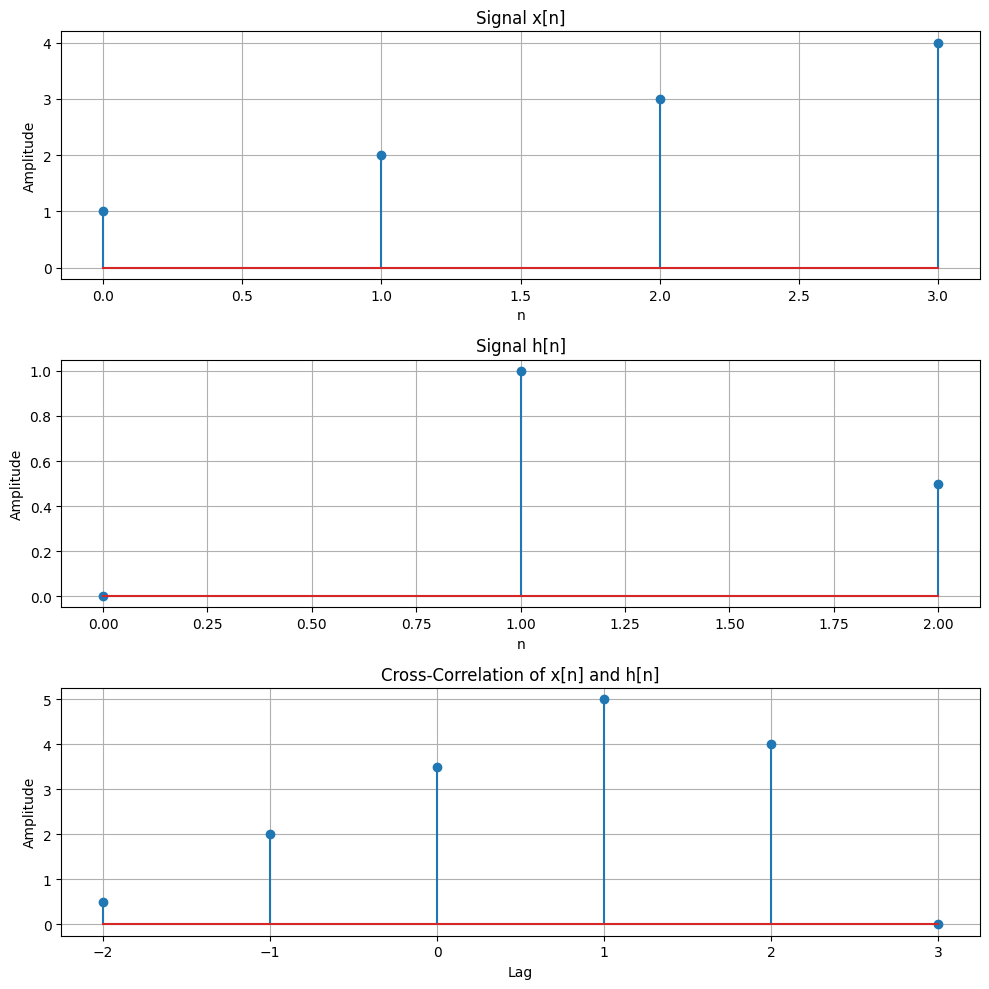

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define two discrete signals
x = np.array([1, 2, 3, 4])
h = np.array([0, 1, 0.5])

# Compute cross-correlation
y = np.correlate(x, h, mode='full')

# Generate time indices
t_x = np.arange(len(x))
t_h = np.arange(len(h))
t_y = np.arange(-len(h) + 1, len(x))

# Plot the signals
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.stem(t_x, x)
plt.title('Signal x[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(3, 1, 2)
plt.stem(t_h, h)
plt.title('Signal h[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(3, 1, 3)
plt.stem(t_y, y)
plt.title('Cross-Correlation of x[n] and h[n]')
plt.xlabel('Lag')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()